# **Title of Project**
Bank Churn Predictive Model

## **Objective**
The objective of this project is to predict whether a customer will churn or not, based on various features such as credit score, geography, and tenure. By identifying potential churners, banks can take proactive measures to retain their customers.

## **Data Source**
The dataset used in this project is obtained from the following source:
https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

The dataset contains the following features:

* CustomerId: Unused variable
* Surname: Unused variable
* CreditScore: Used as input
* Geography: Used as input
* Gender: Used as input
* Age: Used as input
* Tenure: Used as input
* Balance: Used as input
* Num Of Products: Used as input
* Has Credit Card: Used as input
* Is Active Member: Used as input
* Estimated Salary: Used as input
* Churn: Target variable (1 if the customer churned, 0 otherwise)

## **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Import Data**

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Describe Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Data Visualization**

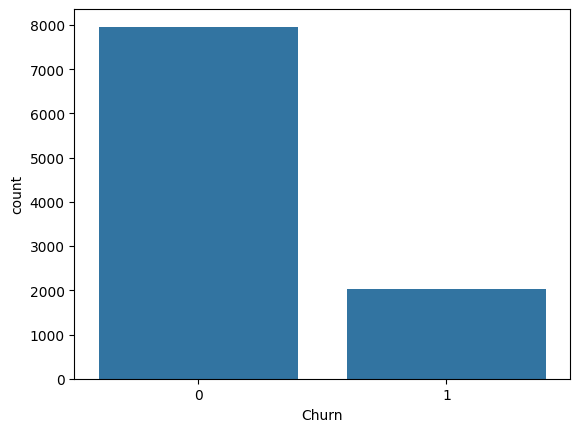

In [5]:
sns.countplot(x="Churn", data=df)
plt.show()

## **Data Preprocessing**

In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [8]:
# Label encoding categorical columns
df["Geography"] = LabelEncoder().fit_transform(df["Geography"])
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# Use the correct column name 'Has Credit Card'
df["Has Credit Card"] = df["Has Credit Card"].astype(int)

# Convert 'Is Active Member' to integer
df["Is Active Member"] = df["Is Active Member"].astype(int)

# Dropping unnecessary columns
df.drop(["CustomerId", "Surname"], axis=1, inplace=True)

# Display the first few rows
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## **Define Target Variable (y) and Feature Variables (X)**

In [9]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X.head(), y.head()

(   CreditScore  Geography  Gender  Age  Tenure    Balance  Num Of Products  \
 0          619          0       0   42       2       0.00                1   
 1          608          2       0   41       1   83807.86                1   
 2          502          0       0   42       8  159660.80                3   
 3          699          0       0   39       1       0.00                2   
 4          850          2       0   43       2  125510.82                1   
 
    Has Credit Card  Is Active Member  Estimated Salary  
 0                1                 1         101348.88  
 1                0                 1         112542.58  
 2                1                 0         113931.57  
 3                0                 0          93826.63  
 4                1                 1          79084.10  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Churn, dtype: int64)

## **Train Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

## **Modeling**

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## **Model Evaluation**

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



array([[1546,   61],
       [ 210,  183]])

## **Prediction**

In [14]:
sample = X_test.iloc[[0]]  # Keep it as a DataFrame, preserving the feature names
model.predict(sample)

array([0])

## **Explanation**
In this project, we built a predictive model to identify potential customer churn. The model was trained on features like credit score, age, and geography to predict whether a customer would churn. We used a RandomForestClassifier and achieved a certain level of accuracy in predicting churn.